# synthdid.py

An implementation in Python of the `sdid` library for Stata [(Clarke, Pailañir, Athey & Imbens; 2023)](https://docs.iza.org/dp15907.pdf).

### Installing the package

```
pip install synthdid
```

## Examples Based on Empirical Application

In [1]:
from synthdid.get_data import california_prop99, quota
from synthdid.synthdid import Synthdid
from matplotlib import pyplot as plt
import numpy as np

### Block Design

In [2]:
df = california_prop99()

In [3]:
Synthdid(df, "State", "Year", "treated", "PacksPerCapita").fit().vcov().summary().summary2

,ATT,Std. Err.,t,P>|t|
0,-15.60383,10.789924,-1.446148,0.148136


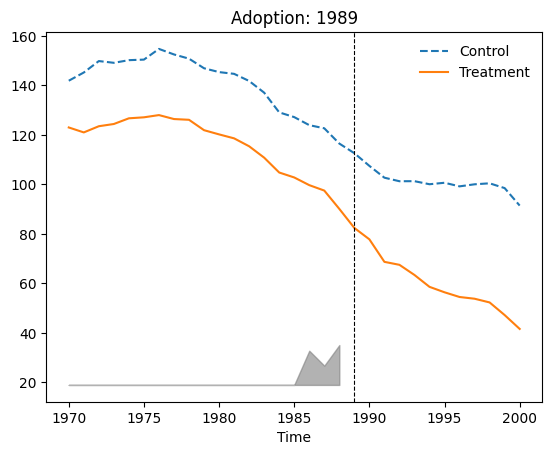

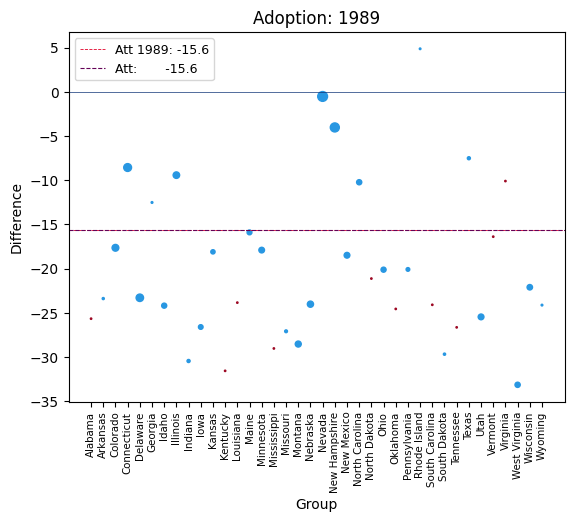

In [4]:
plt.show(Synthdid(df, "State", "Year", "treated", "PacksPerCapita").fit().plot_outcomes())
plt.show(Synthdid(df, "State", "Year", "treated", "PacksPerCapita").fit().plot_weights())

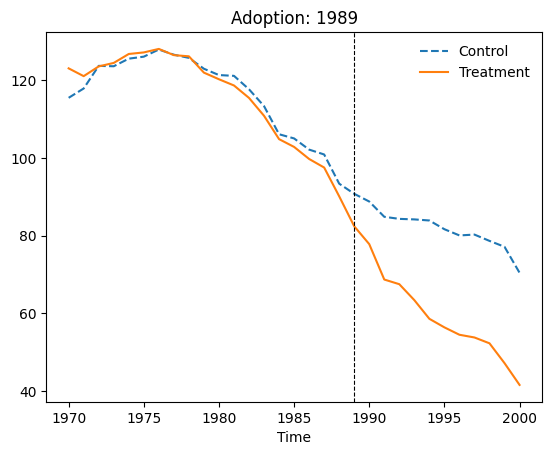

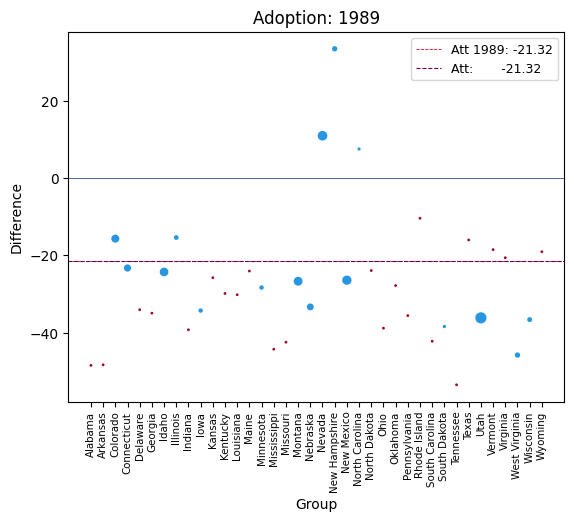

In [5]:
plt.show(Synthdid(df, "State", "Year", "treated", "PacksPerCapita").fit(synth=True, omega_intercept=False).plot_outcomes(wtplot = False))
plt.show(Synthdid(df, "State", "Year", "treated", "PacksPerCapita").fit(synth=True, omega_intercept=False).plot_weights())

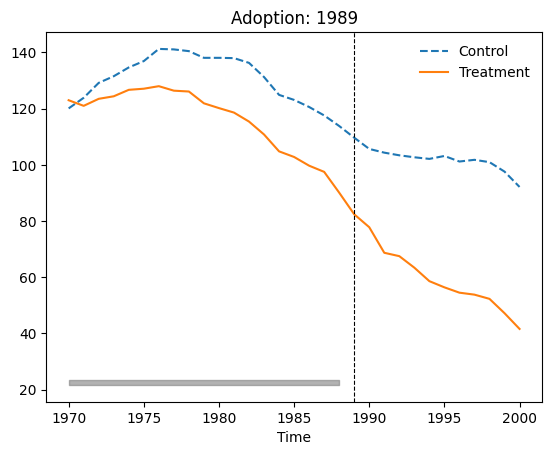

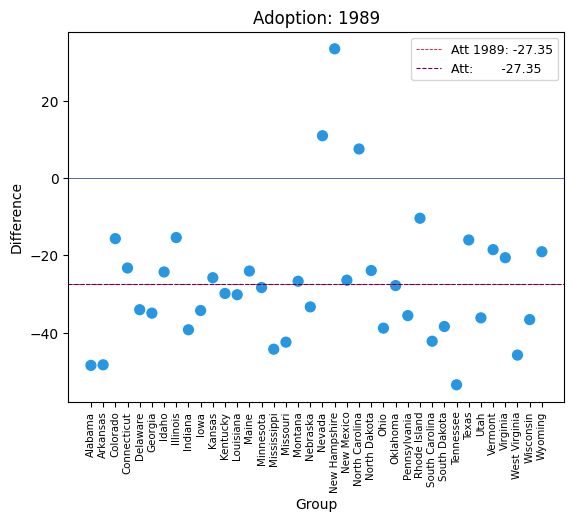

In [6]:
plt.show(Synthdid(df, "State", "Year", "treated", "PacksPerCapita").fit(did=True).plot_outcomes())
plt.show(Synthdid(df, "State", "Year", "treated", "PacksPerCapita").fit(did=True).plot_weights())

### Staggered Adoption Design

In [7]:
df = quota()

In [8]:
fit_model = Synthdid(df, "country", "year", "quota", "womparl").fit().vcov().summary()
fit_model.summary2

,ATT,Std. Err.,t,P>|t|
0,8.0341,1.684382,4.769762,0.000002


In [9]:
fit_model.att_info

,time,att_time,att_wt,N0,T0,N1,T1
0,2000.0,8.388868,0.170213,110,10,1,16
1,2002.0,6.967746,0.297872,110,12,2,14
2,2003.0,13.952256,0.276596,110,13,2,13
3,2005.0,-3.450543,0.117021,110,15,1,11
4,2010.0,2.749035,0.063830,110,20,1,6
5,2012.0,21.762715,0.042553,110,22,1,4
6,2013.0,-0.820324,0.031915,110,23,1,3


In [10]:
fit_covar_model = Synthdid(df[~df.lngdp.isnull()], "country", "year", "quota", "womparl", covariates = ["lngdp"]).fit().vcov(method = "bootstrap").summary()
fit_covar_model.summary2

,ATT,Std. Err.,t,P>|t|
0,8.04901,3.395295,2.370636,0.017757


In [11]:
fit_covar_model_projected = Synthdid(df[~df.lngdp.isnull()], "country", "year", "quota", "womparl", covariates = ["lngdp"]).fit(cov_method = "projected").vcov(method = "bootstrap").summary()
fit_covar_model_projected.summary2

,ATT,Std. Err.,t,P>|t|
0,8.05903,3.428897,2.350327,0.018757


### Inference Options

In [12]:
countries_for_excluding = ["Algeria", "Kenya", "Samoa", "Swaziland", "Tanzania"]
se_examples = Synthdid(
        df[~df.country.isin(countries_for_excluding)],
        "country",
        "year",
        "quota",
        "womparl"
).fit().vcov(method = "bootstrap").summary()
se_examples.summary2

Error
Error
Error


,ATT,Std. Err.,t,P>|t|
0,10.33066,5.404923,1.911343,0.055961


In [13]:
se_examples.vcov(method = "placebo").summary()
se_examples.summary2

,ATT,Std. Err.,t,P>|t|
0,10.33066,2.244618,4.602413,0.000004


In [14]:
se_examples.vcov(method = "jackknife").summary()
se_examples.summary2

,ATT,Std. Err.,t,P>|t|
0,10.33066,6.04213,1.709771,0.087308
